# Read the data

Might need to re-factor the source, encoding = 'latin-1' is undesirable.

In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(30,  30)})
import matplotlib.pyplot as plt

In [ ]:
pluri_patients = pd.read_csv('../data/raw/pluri_patients_2020.csv', sep = ';')

In [ ]:
pluri_patients.head()

In [ ]:
profile = ProfileReport(pluri_patients, minimal=True)

In [ ]:
# to write the report
profile.to_file("../reports/pluri_patients_minimal.html")

In [71]:
chronic_diseases  = pluri_patients.iloc[:,10:66] # select chronic diseases columns
chronic_diseases["hospitalizacion"] = pluri_patients["n_hosp"].apply(lambda x: int(x>0))
chronic_diseases["urgencias"] = pluri_patients["n_urg"].apply(lambda x: int(x>0))
chronic_diseases["estado_vital"] = pluri_patients["estado_vital"].apply(lambda x: int(x=='vivo'))
chronic_diseases.head()

,pancreatobiliar,glaucoma,hipertension,cerebrovascular,vertigo_y_alteraciones_auditivas,bradicardias_y_enfermedades_de_la_conduccion,otras_genitourinarias,depresion_y_alteraciones_del_animo,epoc,enfermedad_renal_cronica,...,lumbalgia_cronica,otras_enfermedades_cardiovasculares,parkinson,cancer,fibrilacion_auricular,diabetes,falla_cardiaca,hospitalizacion,urgencias,estado_vital
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,1
2,0,0,4,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,1,1,0
4,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,1


In [68]:
sns.diverging_palette(20, 220, n = 9)

[(0.7634747047461135, 0.3348456555528834, 0.225892295531744),
 (0.8104957325994613, 0.4877733018117068, 0.40600765842877506),
 (0.8582485940772356, 0.6430811085805399, 0.5889263305017547),
 (0.9052696219305835, 0.7960087548393634, 0.7690416933987858),
 (0.9426203143802194, 0.9476186718337934, 0.9499283364742905),
 (0.764598723186337, 0.8346048011319588, 0.8572576805578844),
 (0.5891792627967477, 0.7208941125350526, 0.7620977191012962),
 (0.41512497557259387, 0.6080683587130622, 0.6676783244296923),
 (0.24715576253545807, 0.49918708160096675, 0.5765599057376697)]

### Calculate correlations

In [87]:
corr = chronic_diseases.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

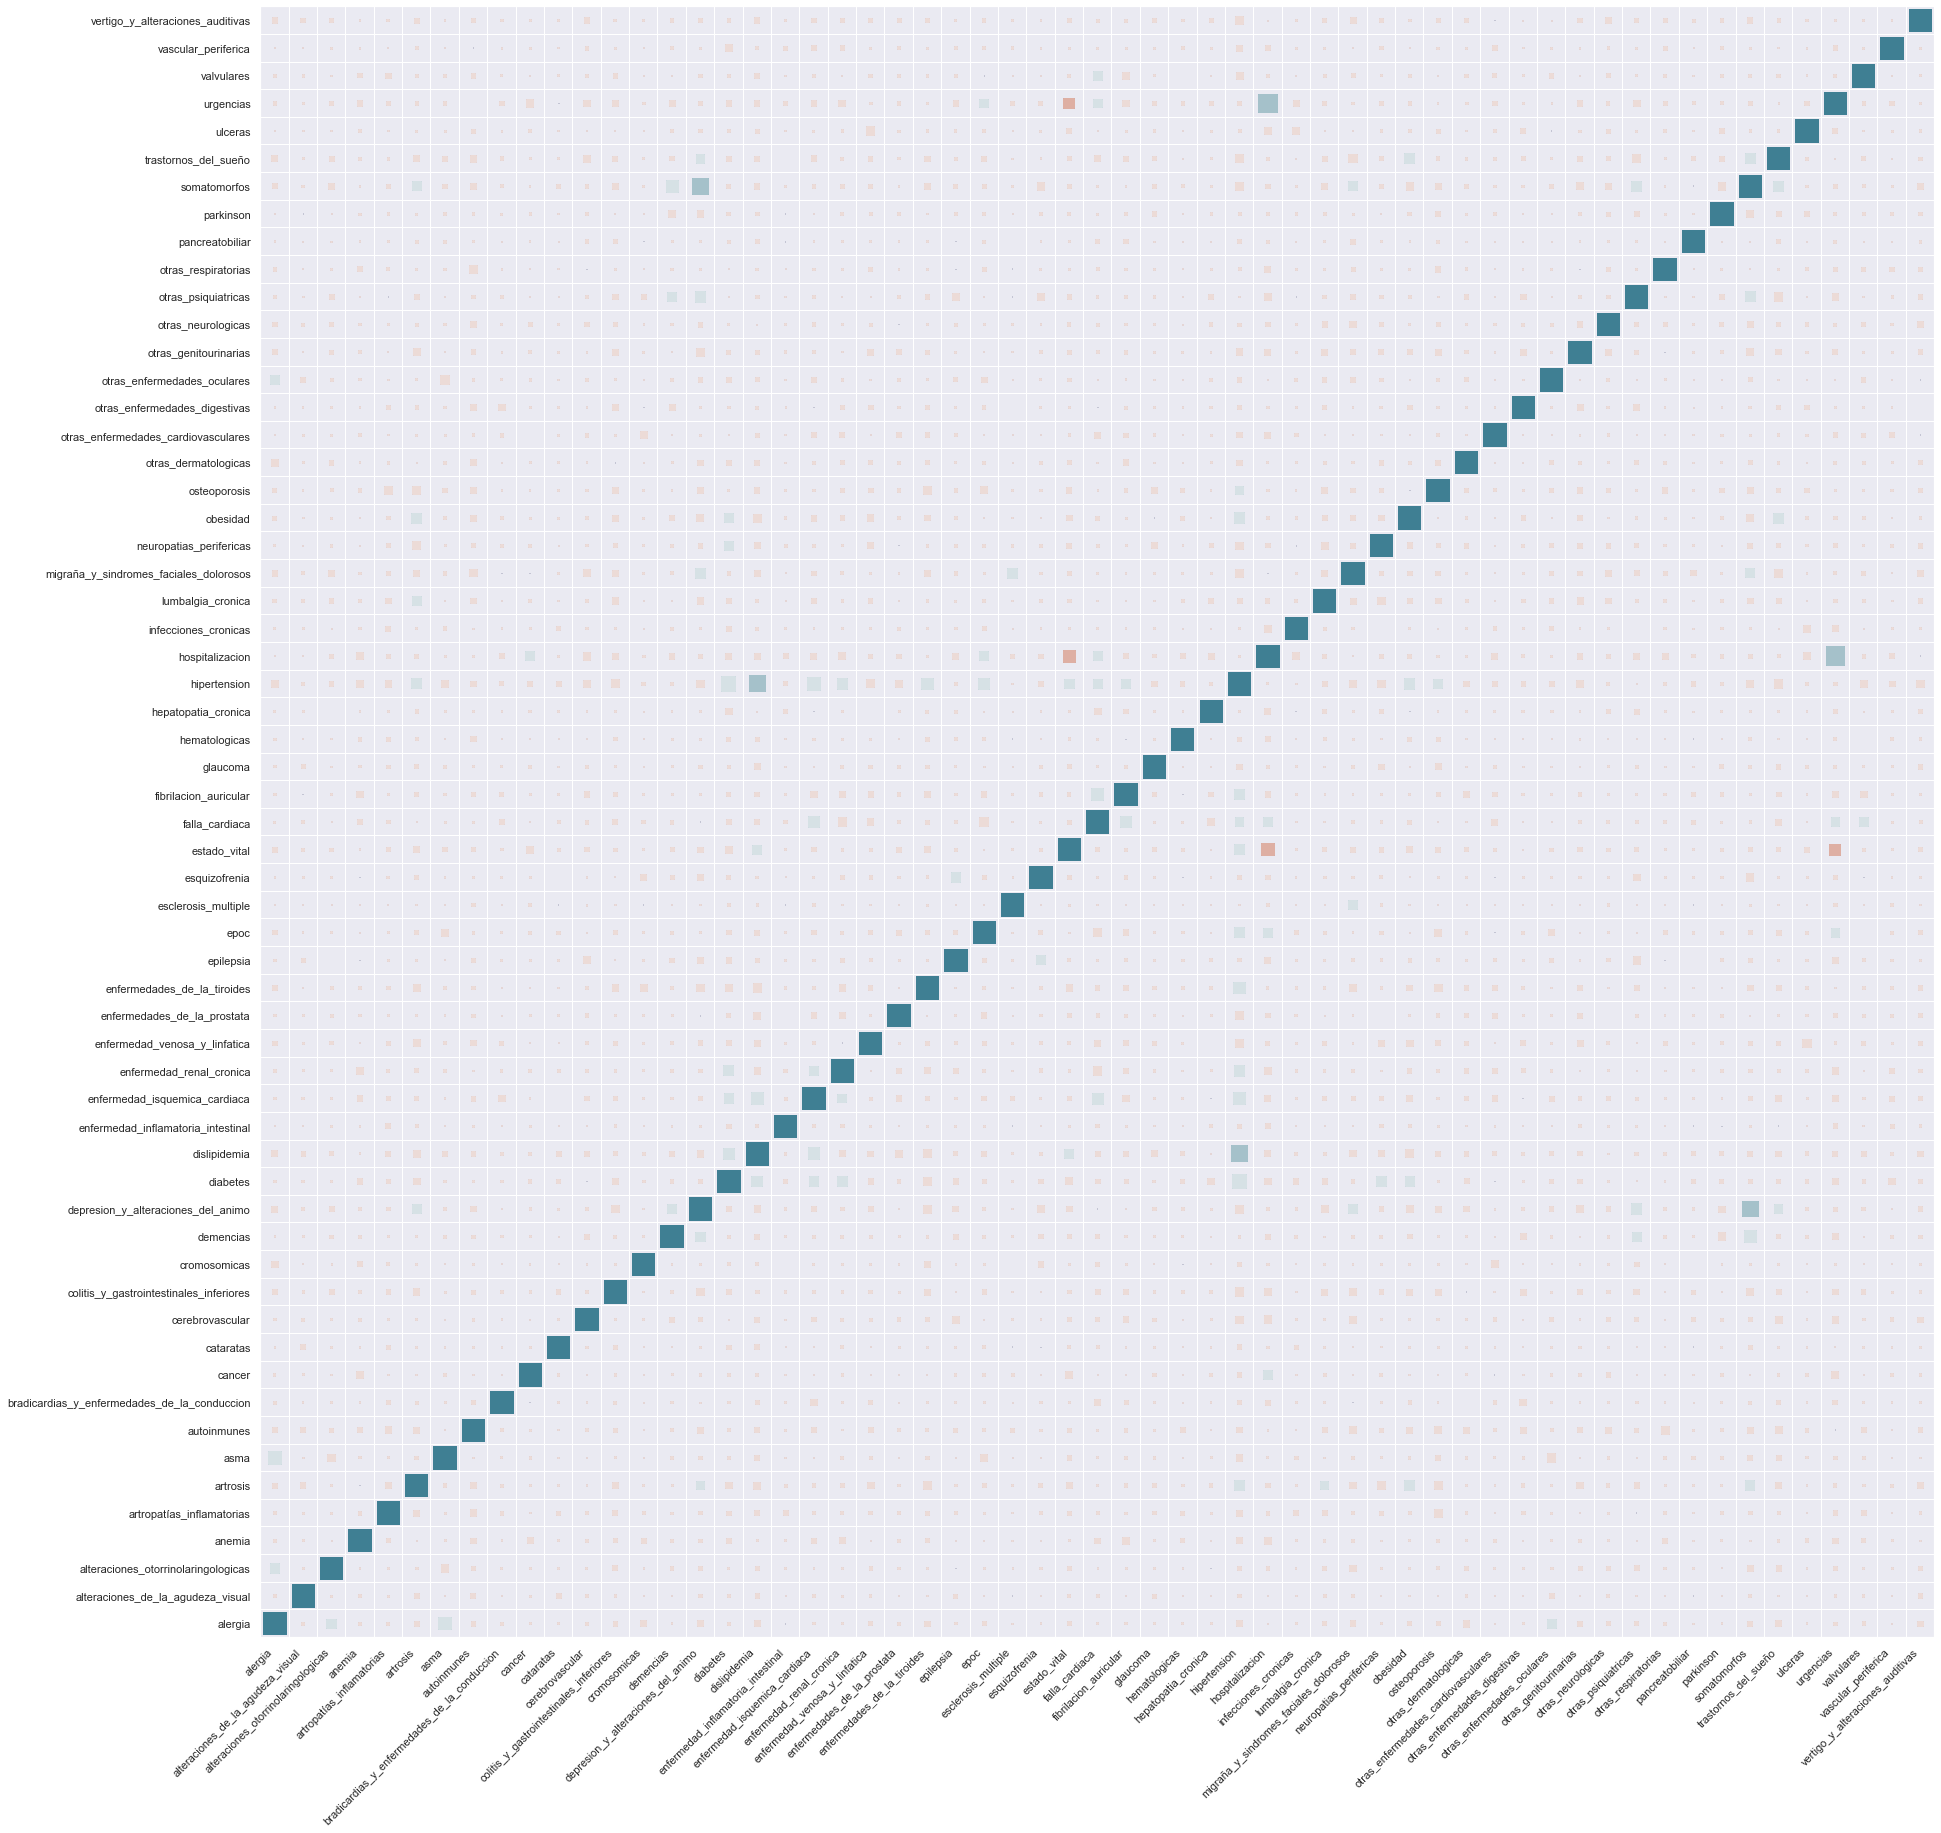

In [72]:
n_colors = 8 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]


def manual_heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ax.scatter(
    x=x.map(x_to_num), # Use mapping for x
    y=y.map(y_to_num), # Use mapping for y
    s=size * size_scale, # Vector of square sizes, proportional to size parameter
    c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
    marker='s') # Use square as scatterplot marker

manual_heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color = corr['value']
)

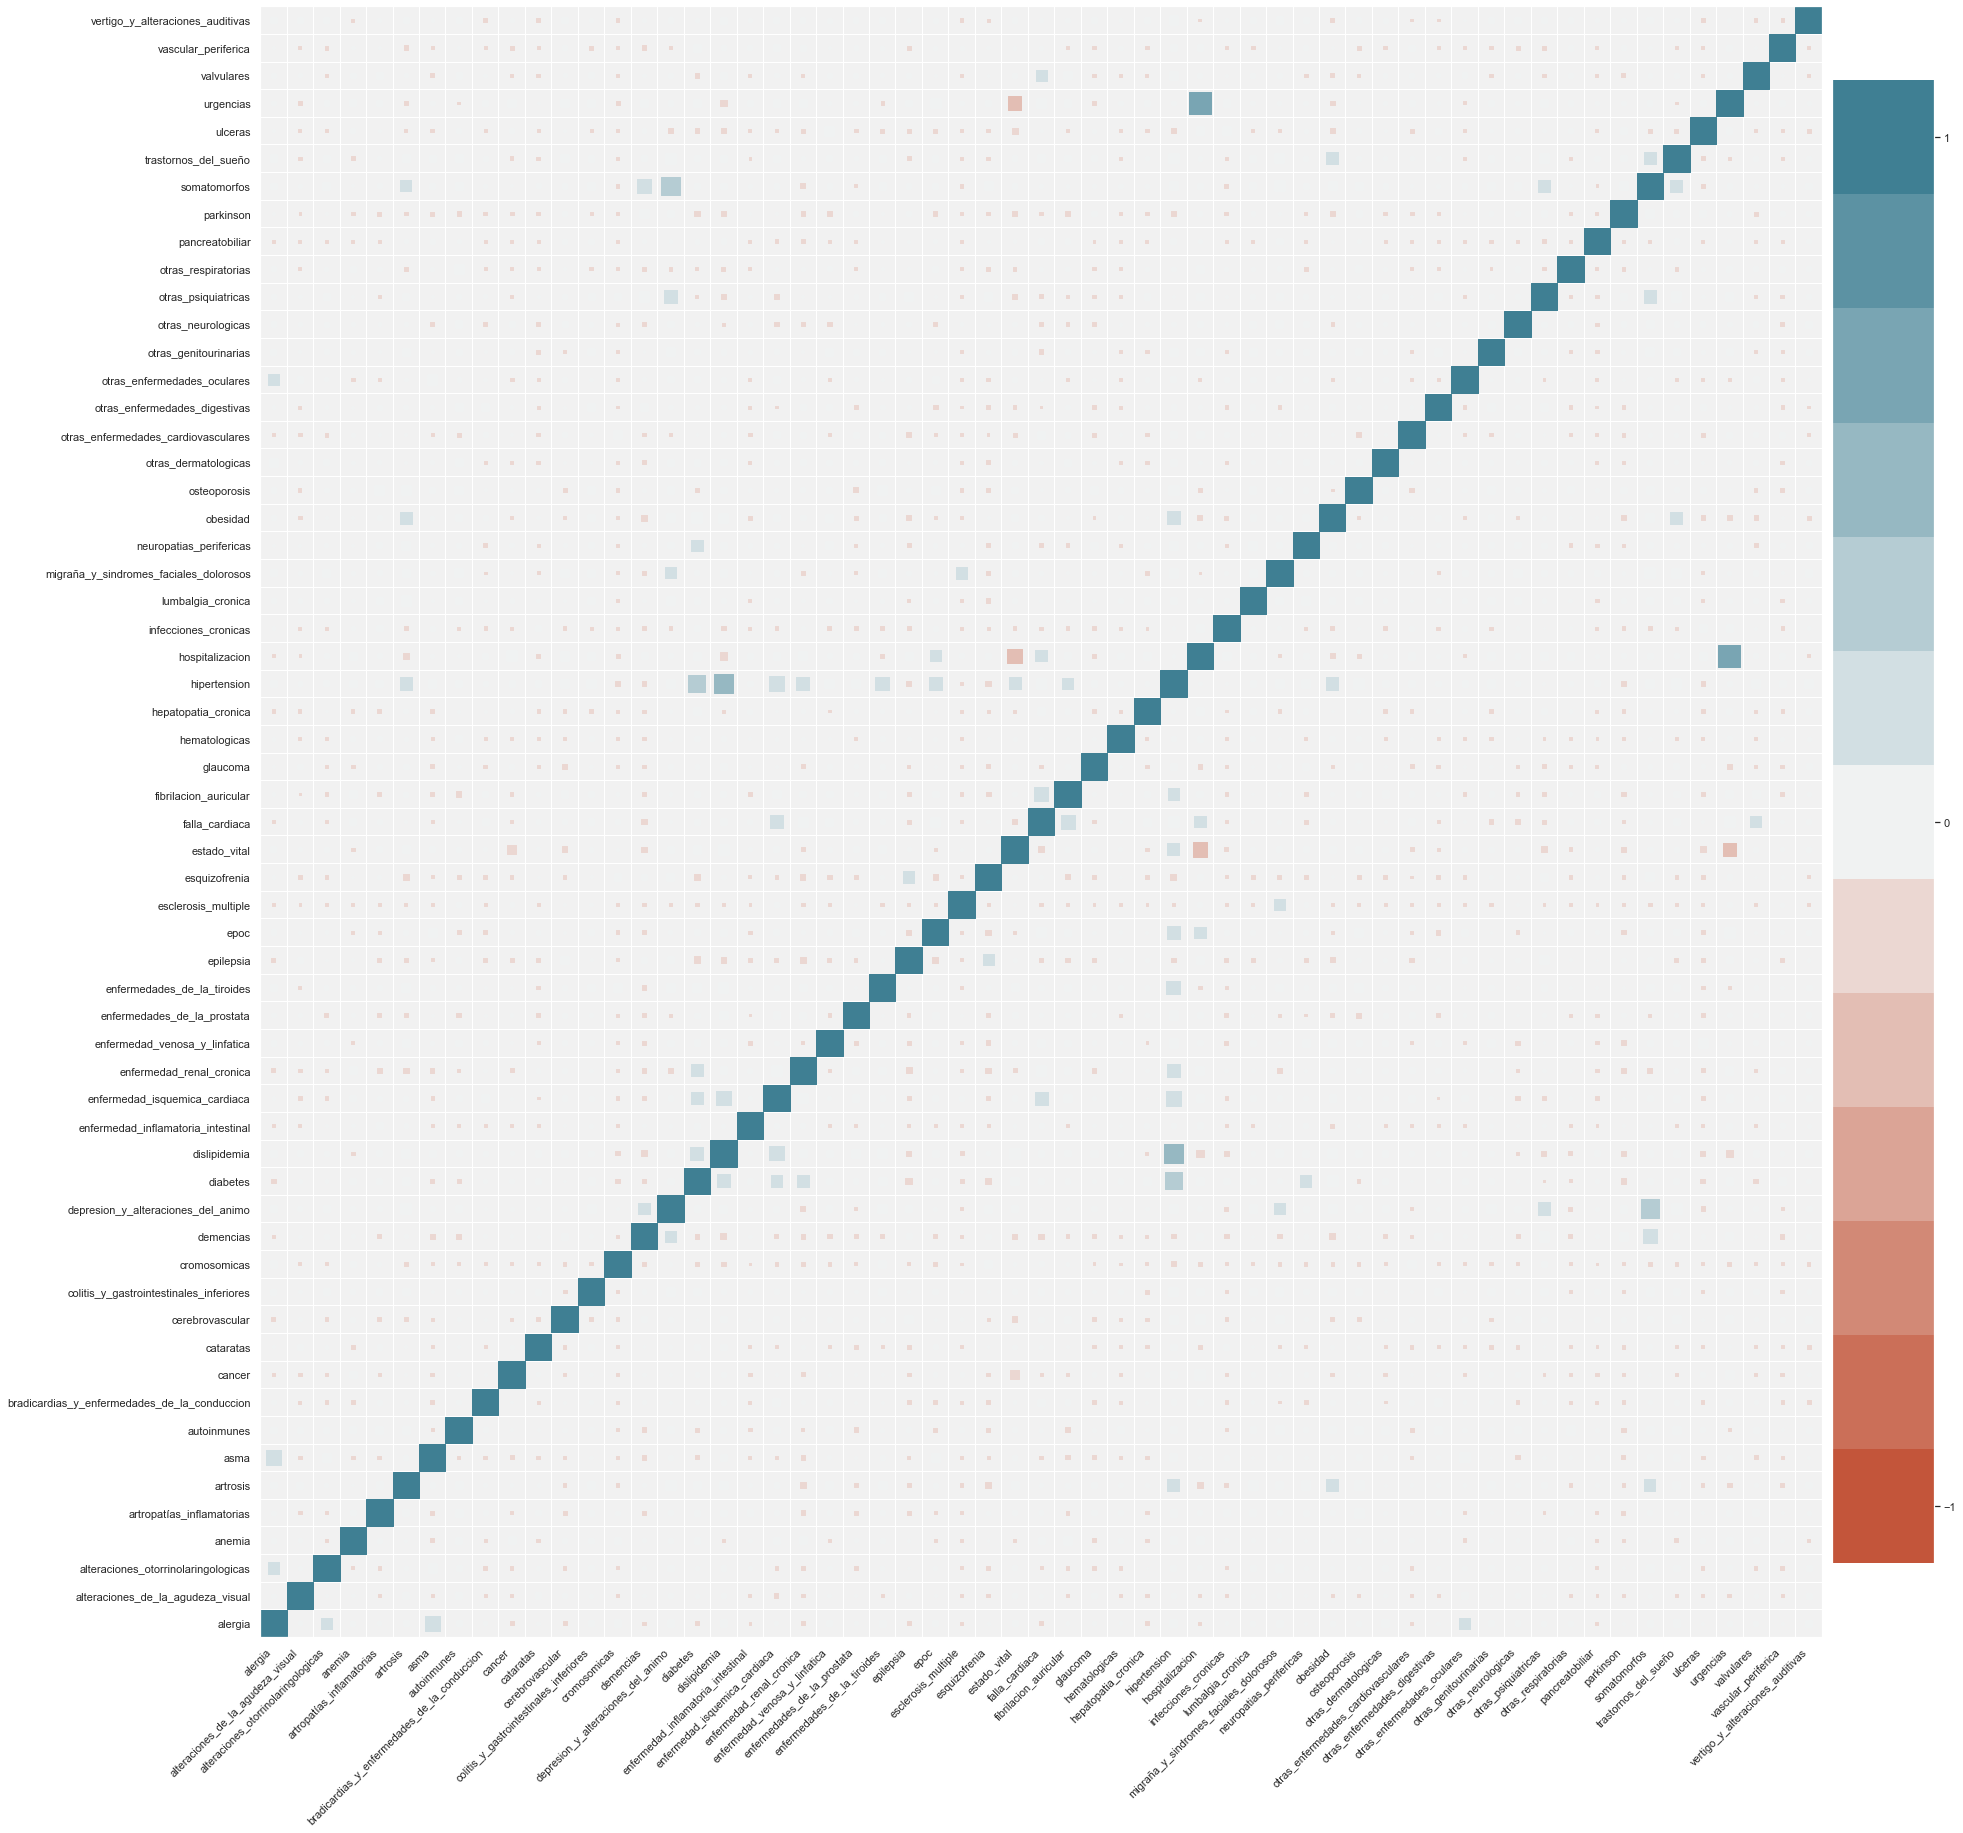

In [89]:
from heatmap import heatmap, corrplot
my_palette = sns.diverging_palette(20, 220, n= 13)

heatmap(x=corr['x'],
y=corr['y'],
size=corr['value'].abs(),
size_scale = 700,
color = corr['value'],
palette = my_palette,
color_range = (-1, 1)
)

In [112]:
chronic_diseases_pivoted = pd.melt(chronic_diseases)
chronic_diseases_agg = chronic_diseases_pivoted.groupby("variable").sum().sort_values("value", ascending = True)

<AxesSubplot:ylabel='variable'>

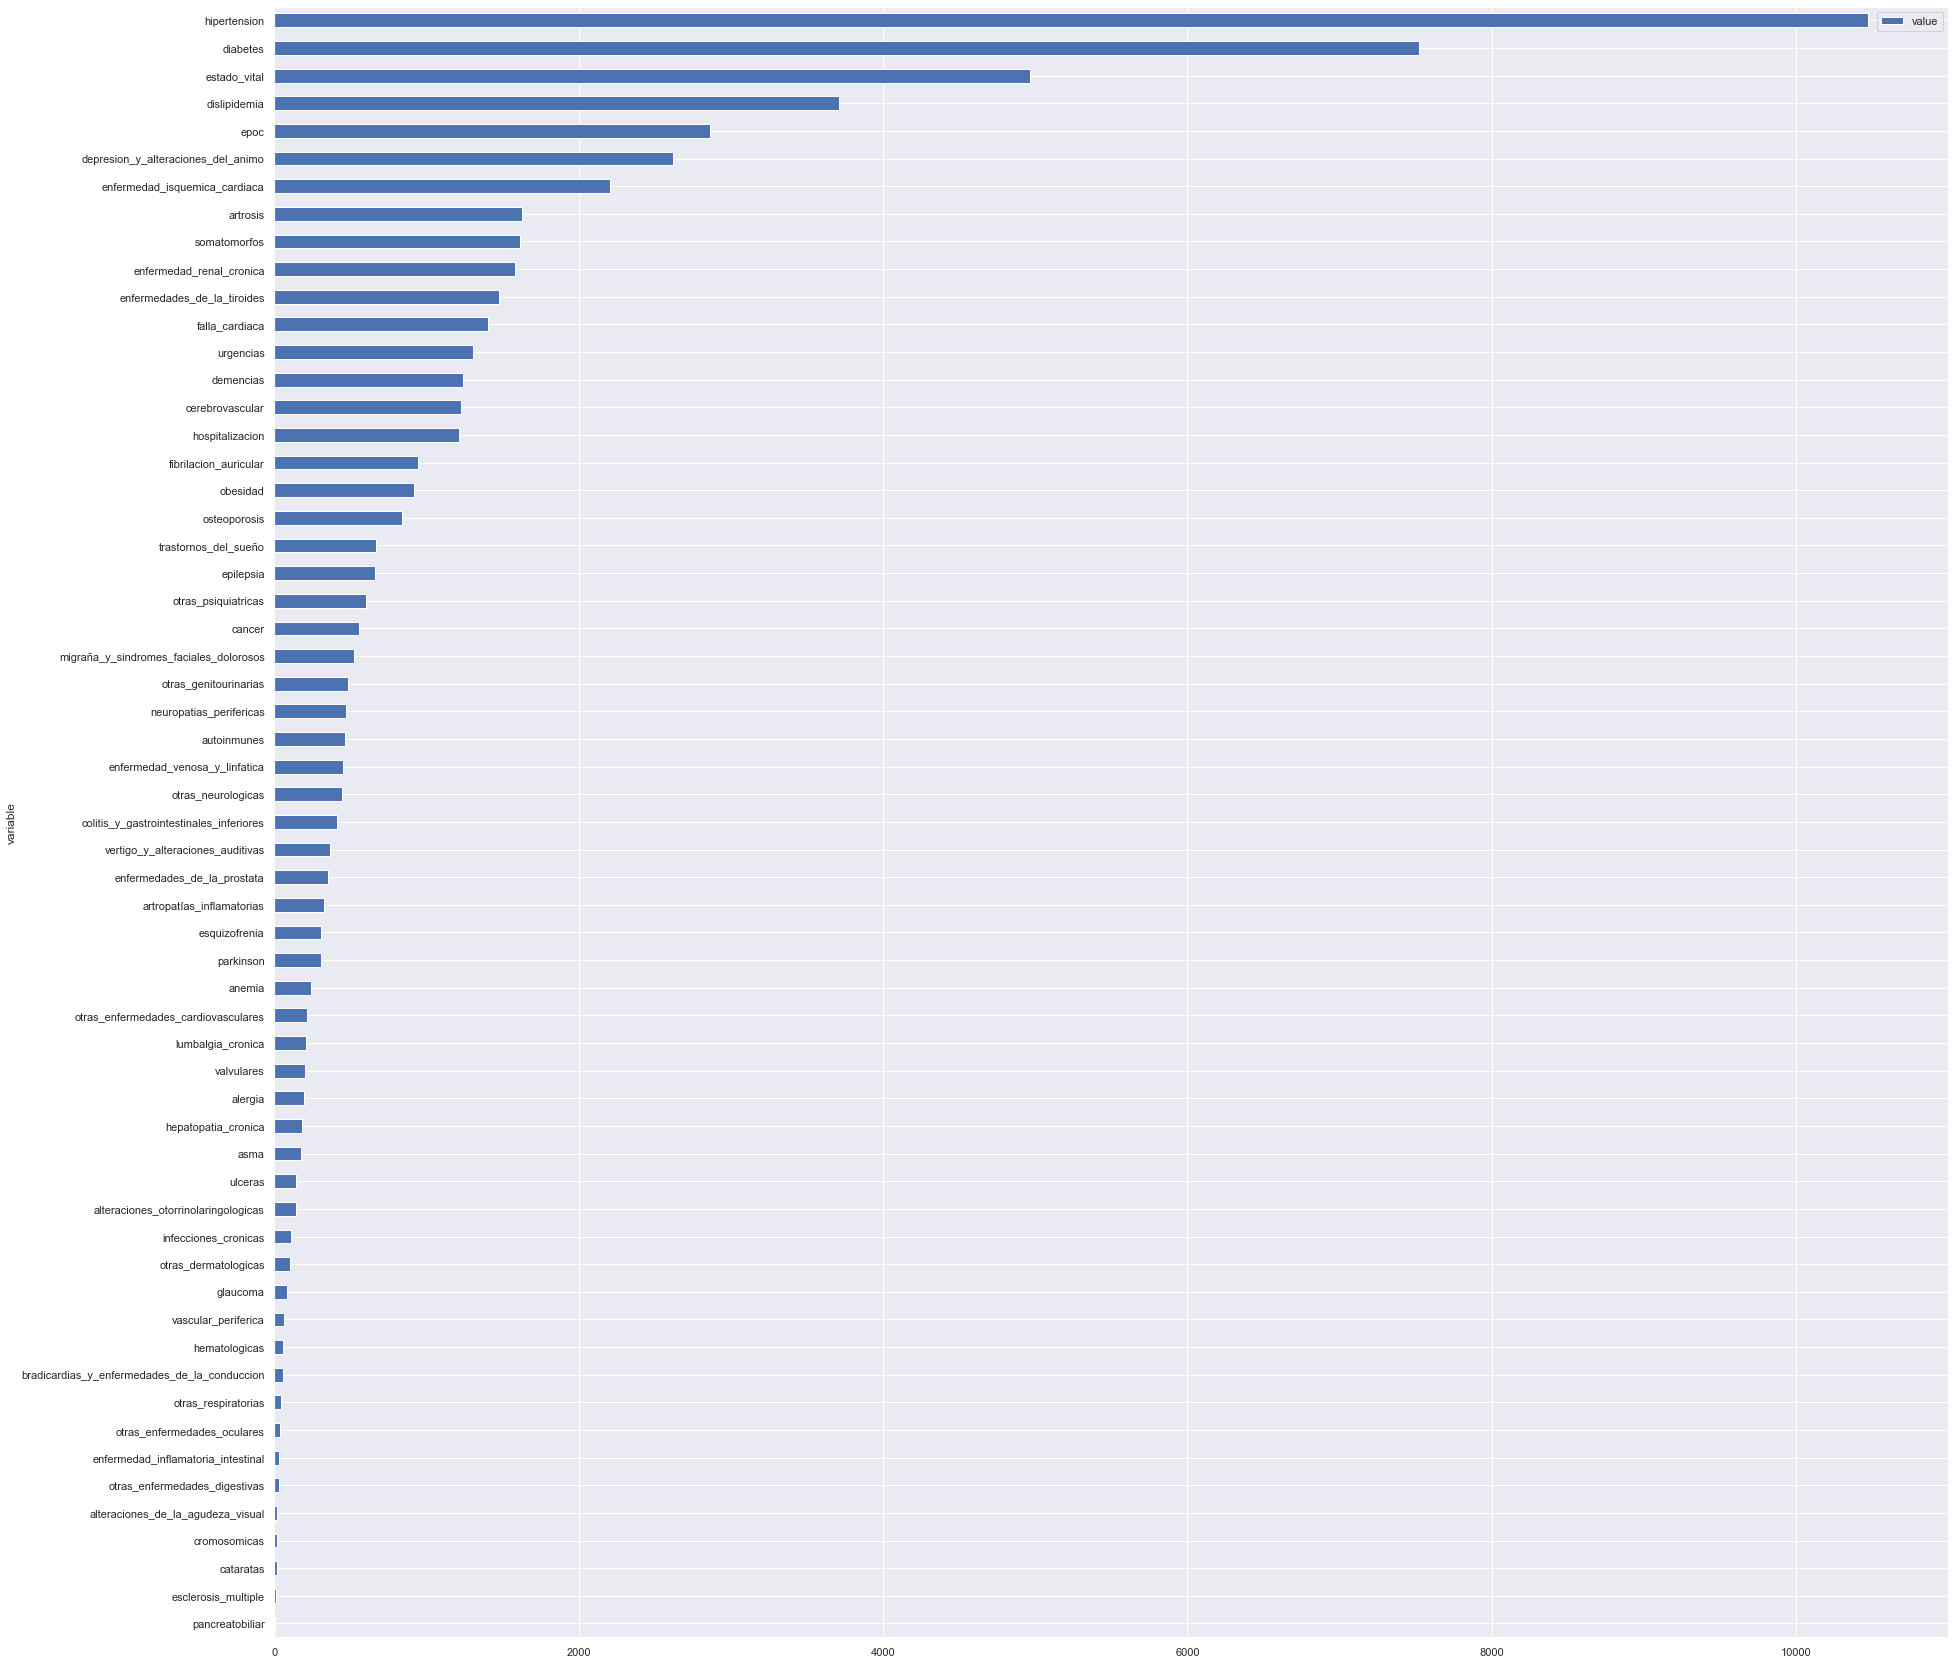

In [114]:
chronic_diseases_agg.plot(kind = "barh")